# **📘 TASK–1 : Data Loading & Preprocessing**

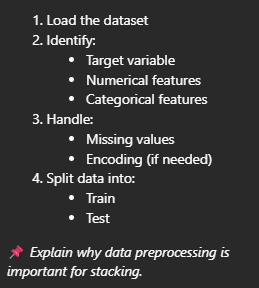

In [3]:
# 1 Load the dataset
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

# mount google drive
from google.colab import drive
drive.mount('/content/drive')


# load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/train_u6lujuX_CVtuZ9i.csv"
data = pd.read_csv(file_path)

data.head()

Mounted at /content/drive


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Q2 Identify target, numerical and categorical features

target = "Loan_Status"

numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = data.select_dtypes(include=["object"]).columns.tolist()

numerical_features, categorical_features


(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 ['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

In [5]:
# Q3 Handle missing values

# Numerical → fill with mean
for col in numerical_features:
    data[col].fillna(data[col].mean(), inplace=True)

# Categorical → fill with mode
for col in categorical_features:
    data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-3947134675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipython-input-3947134675.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [6]:
# Q4 Encoding categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])


In [7]:
# Q5 Train test split
from sklearn.model_selection import train_test_split

X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **📌 Why Data Preprocessing is Important for Stacking (Theory)**
- Data preprocessing is important for stacking because different models require properly scaled, encoded, and clean data to learn correctly.
- If data has missing values or unencoded categories, base models and the meta-model may learn wrong patterns, reducing overall performance.

# **📘 TASK–2 : Build Base Models**

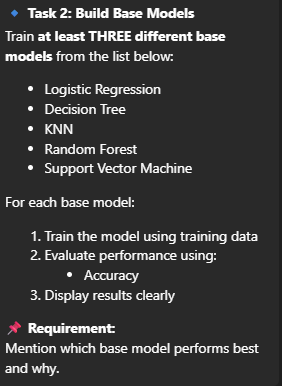

In [9]:
# Q6 Train base models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

results


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7886178861788617,
 'Decision Tree': 0.6910569105691057,
 'KNN': 0.6178861788617886,
 'Random Forest': 0.7642276422764228,
 'Support Vector': 0.6504065040650406}

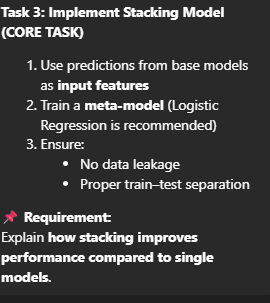

In [10]:
# Q7 Implement stacking model

from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("dt", DecisionTreeClassifier()),
        ("knn", KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression()
)

stack_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [11]:
# Q8 Evaluate stacking model

stack_preds = stack_model.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)

stack_acc


0.7967479674796748

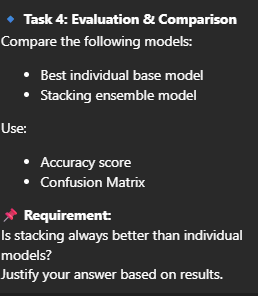

In [12]:
# Q1 Identify best individual base model

best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

best_model_name, best_model_accuracy


('Logistic Regression', 0.7886178861788617)

In [13]:
# Q2 Accuracy comparison

print("Best Individual Model:", best_model_name)
print("Best Individual Accuracy:", best_model_accuracy)

print("Stacking Model Accuracy:", stack_acc)


Best Individual Model: Logistic Regression
Best Individual Accuracy: 0.7886178861788617
Stacking Model Accuracy: 0.7967479674796748


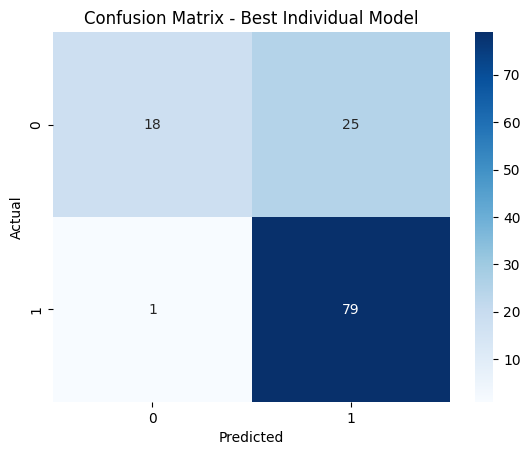

In [14]:
# Q3 Confusion matrix for best individual model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = models[best_model_name]
best_preds = best_model.predict(X_test)

cm_best = confusion_matrix(y_test, best_preds)

sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Best Individual Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


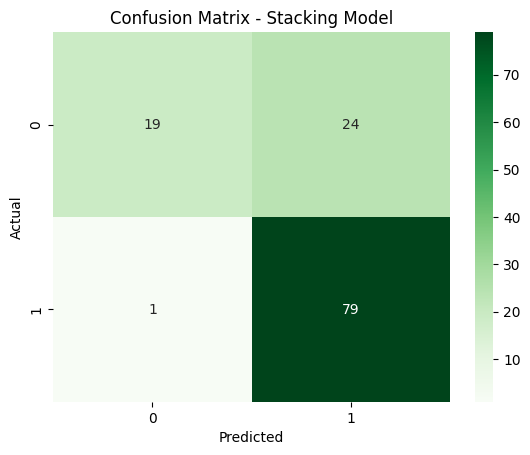

In [15]:
# Q4 Confusion matrix for stacking model

cm_stack = confusion_matrix(y_test, stack_preds)

sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Stacking Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
